# K-Means Clustering Algorithm
**Author**: James Chen, School of Animal Sciences, Virginia Tech

**Date**: July 21, 2022

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from image_handler import load_img, save_img

In [5]:
k = 2
n = 50
N = n * k
means = [[40, 40], [60, 70]]
stds = [[[80, 0],
         [0, 70]],
        [[60, 10],
         [10, 90]]]
data = []
for mean, std in zip(means, stds):
    data += [np.random.multivariate_normal(mean=mean, cov=std, size=n)]
data = np.concatenate(data)
print("Shape: ", data.shape)
print(data)

Shape:  (100, 2)
[[20.29567267 43.31675154]
 [42.67741053 54.35105125]
 [53.90144405 42.44758551]
 [43.81132633 48.89527844]
 [36.33357301 41.22056267]
 [27.50427505 32.50883563]
 [55.17464592 37.80143772]
 [37.97903314 47.42458777]
 [33.21841923 54.72884355]
 [34.62242956 41.03670777]
 [37.49896307 48.05026225]
 [45.60751666 45.5042606 ]
 [42.16147036 37.91040329]
 [50.16542933 56.71081235]
 [28.24263884 39.28501004]
 [29.45370144 51.33617116]
 [31.73367698 33.42517507]
 [29.89170761 33.97565957]
 [50.35184316 28.67927203]
 [45.88163839 39.91754092]
 [32.62216437 35.81495599]
 [23.33020385 44.62078188]
 [30.24206985 33.33395483]
 [31.77604852 46.43570333]
 [41.6001443  49.37313034]
 [36.5878003  39.3955626 ]
 [40.48110646 32.78962384]
 [33.64705185 43.64184223]
 [37.25858077 45.29411746]
 [22.44921985 51.98436373]
 [41.85125332 32.70273534]
 [46.64107822 54.5496218 ]
 [32.44164918 32.97735096]
 [34.69695793 34.63084923]
 [35.96114669 25.98887371]
 [55.02067457 27.38301698]
 [63.320460

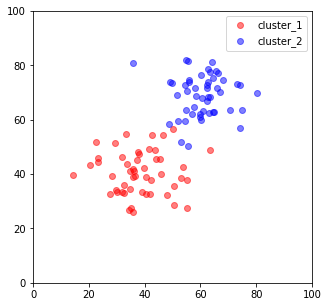

In [6]:
plt.figure(figsize=(5, 5))
plt.scatter(data[:n, 0], data[:n, 1], c="red", alpha=.5, label="cluster_1")
plt.scatter(data[n:, 0], data[n:, 1], c="blue", alpha=.5, label="cluster_2")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()

### Randomly initialize centroids

In [7]:
centroids = data[np.random.choice(N, k)]

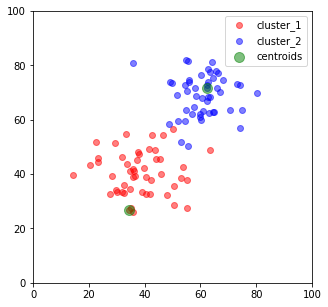

In [8]:
# plotting
plt.figure(figsize=(5, 5))
plt.scatter(data[:n, 0], data[:n, 1], c="red", alpha=.5, label="cluster_1")
plt.scatter(data[n:, 0], data[n:, 1], c="blue", alpha=.5, label="cluster_2")
plt.scatter(centroids[:, 0], centroids[:, 1], c="green", alpha=.5, s=100, label="centroids")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()

### Calculate distance

In [9]:
x = np.array([0, 0])
y = np.array([3, 4])
def euclidean_distance(x, y):
    return np.sum((x - y) ** 2) ** .5
print("the distance is: ", euclidean_distance(x, y))

the distance is:  5.0


### Assignment stage

In [10]:
N = len(data)
k = len(centroids)
distances = np.zeros((N, k))
for i, x in enumerate(data):
    for j, center in enumerate(centroids):
        distances[i, j] = euclidean_distance(x, center)
labels = np.argmin(distances, axis=1)
print("Assigned cluster: \n", labels)

Assigned cluster: 
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Update stage

In [11]:
new_centroids = np.zeros((k, 2))
for i in range(k):
    new_centroids[i] = data[labels == i].mean(axis=0)
print("New center: \n", new_centroids)


New center: 
 [[37.1214989  39.37000633]
 [59.90950144 67.82266338]]


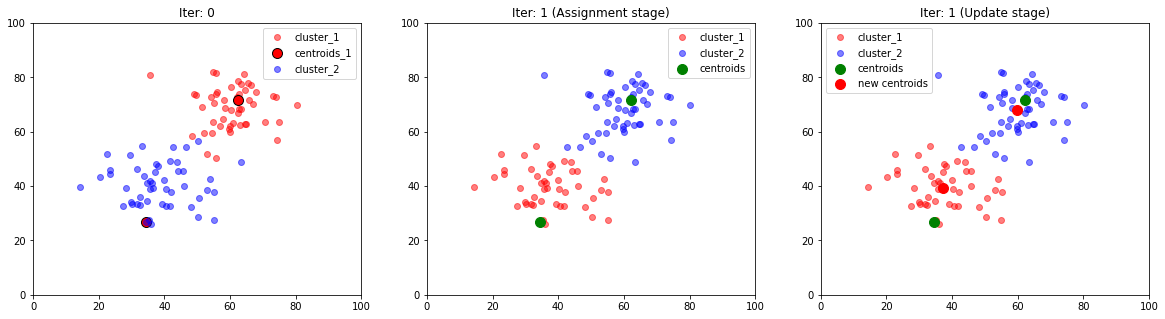

In [21]:
# plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
#
axes[0].set_title("Iter: 0")
axes[0].scatter(data[n:, 0], data[n:, 1], c="red", alpha=.5, label="cluster_1")
axes[0].scatter(centroids[0, 0], centroids[0, 1], c="red", alpha=1, edgecolor='black', s=100, label="centroids_1")
axes[0].scatter(data[:n, 0], data[:n, 1], c="blue", alpha=.5, label="cluster_2")
axes[0].scatter(centroids[1, 0], centroids[1, 1], c="red", alpha=1, edgecolor='black', s=100, label="centroids_1")
#
axes[1].set_title("Iter: 1 (Assignment stage)")
axes[1].scatter(data[labels==0, 0], data[labels==0, 1], c="red", alpha=.5, label="cluster_1")
axes[1].scatter(data[labels==1, 0], data[labels==1, 1], c="blue", alpha=.5, label="cluster_2")
axes[1].scatter(centroids[:, 0], centroids[:, 1], c="green", alpha=1, s=100, label="centroids")
#
axes[2].set_title("Iter: 1 (Update stage)")
axes[2].scatter(data[labels==0, 0], data[labels==0, 1], c="red", alpha=.5, label="cluster_1")
axes[2].scatter(data[labels==1, 0], data[labels==1, 1], c="blue", alpha=.5, label="cluster_2")
axes[2].scatter(centroids[:, 0], centroids[:, 1], c="green", alpha=1, s=100, label="centroids")
axes[2].scatter(new_centroids[:, 0], new_centroids[:, 1], c="red", alpha=1, s=100, label="new centroids")
#
for i in range(3):
    axes[i].set_xlim(0, 100)
    axes[i].set_ylim(0, 100)
    axes[i].legend()

In [13]:
def kmeans(X, k, niter=20):
    n = len(X)
    centers = X[np.random.choice(n, k)]
    for i in range(niter):
        labels = assignment(X, centers)
        centers = update(X, labels, k)
    return dict(labels=labels, centers=centers)

def euclidean_distance(x, y):
    return np.sum((x - y) ** 2) ** .5

def assignment(X, centers):
    n = len(X)
    k = len(centers)
    distances = np.zeros((n, k))
    for i, x in enumerate(X):
        for j, center in enumerate(centers):
            distances[i, j] = euclidean_distance(x, center)
    labels = np.argmin(distances, axis=1)
    return labels

def update(X, labels, k):
    n, p = X.shape
    new_centers = np.zeros((k, p))
    for i in range(k):
        new_centers[i] = X[labels == i].mean(axis=0)
    return new_centers

In [14]:
kmean = kmeans(data, 2, niter=10)
kmean

{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'centers': array([[37.43557162, 39.99835342],
        [60.49604979, 68.33698364]])}

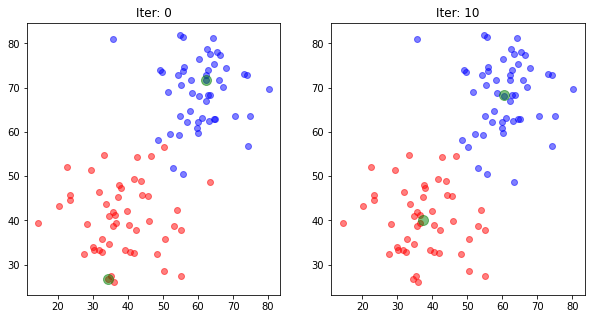

In [15]:
# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
#
axes[0].set_title("Iter: 0")
axes[0].scatter(data[:n, 0], data[:n, 1], c="red", alpha=.5, label="cluster_1")
axes[0].scatter(data[n:, 0], data[n:, 1], c="blue", alpha=.5, label="cluster_2")
axes[0].scatter(centroids[:, 0], centroids[:, 1], c="green", alpha=.5, s=100, label="centroids")
# 
axes[1].set_title("Iter: 10")
axes[1].scatter(data[kmean["labels"]==0, 0], data[kmean["labels"]==0, 1], c="red", alpha=.5, label="cluster_1")
axes[1].scatter(data[kmean["labels"]==1, 0], data[kmean["labels"]==1, 1], c="blue", alpha=.5, label="cluster_2")
axes[1].scatter(kmean["centers"][:, 0], kmean["centers"][:, 1], c="green", alpha=.5, s=100, label="centroids")
#

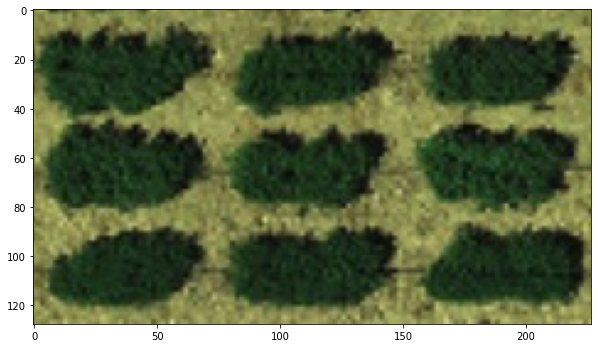

In [30]:
img = load_img("plots.jpg")
plt.figure(figsize=(10, 10))
plt.imshow(img)

In [31]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [32]:
df = pd.DataFrame(img.reshape((-1, 3)))
df.columns = ["red", "green", "blue"]
df.loc[:, "color"] = ["rgb(%d, %d, %d)" % tuple(row.values.tolist())  for _, row in df.iterrows()]
trace = go.Scatter3d(x=df.red, y=df.green, z=df.blue)
layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [37]:
h, w, c = img.shape
data = img.reshape((-1, c))
kmean = kmeans(data, 3)

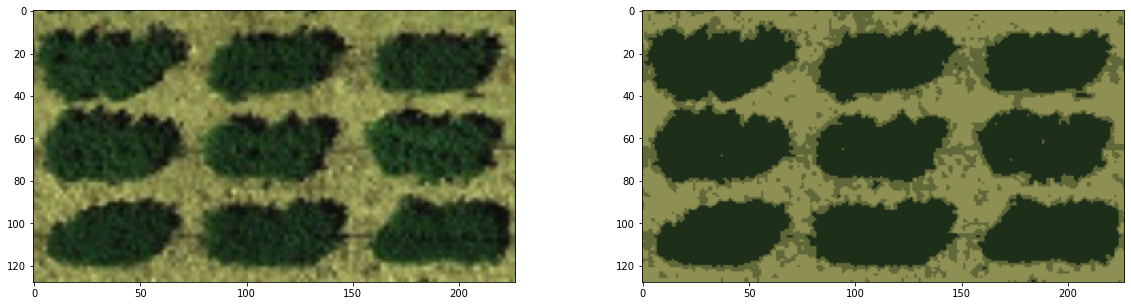

In [45]:
labels = kmean["labels"]
centers = kmean["centers"].astype(int)
img_new = centers[labels].reshape((h, w, c))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].imshow(img)
axes[1].imshow(img_new)

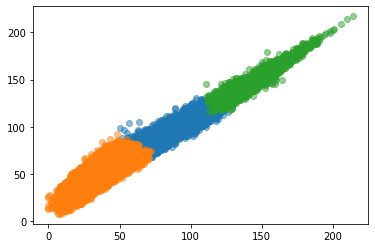

In [48]:
plt.scatter(data[labels==0, 0], data[labels==0, 1], alpha=.5)
plt.scatter(data[labels==1, 0], data[labels==1, 1], alpha=.5)
plt.scatter(data[labels==2, 0], data[labels==2, 1], alpha=.5)